In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}

In [2]:
n=8

In [3]:
encode=QuantumCircuit(n)

NameError: name 'QuantumCircuit' is not defined

In [4]:
from qiskit import QuantumCircuit,Aer,assemble

In [5]:
from qiskit.visualization import plot_histogram


In [6]:
encode=QuantumCircuit(n)

In [7]:
encode.x(7)

In [8]:
encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [11]:
n_q = n
n_b = n
output=QuantumCircuit(n_q, n_b)

In [13]:
for i in range(n):
    output.measure(i,i)

In [14]:
output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

In [15]:
qc=output+encode

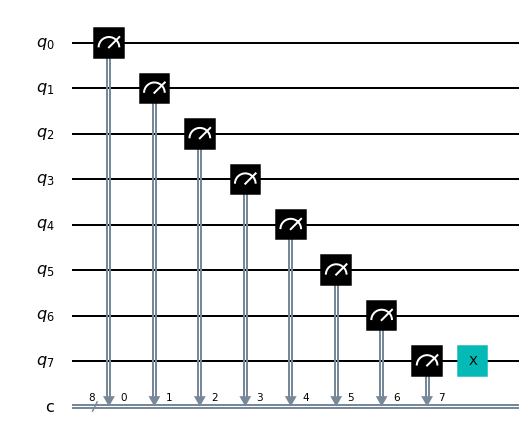

In [16]:
qc.draw(output = 'mpl', justify='none')

In [17]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)#q0 is the control qubit and q1 is the target qubit
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [21]:
qc= QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [31]:
#If we don't want to overwrite on our previous qubits,
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
#qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       ░       
q_0: ┤ X ├─░───■────────░───■───░───────
     └───┘ ░   │        ░   │   ░       
q_1: ──────░───┼────■───░───■───░───────
           ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

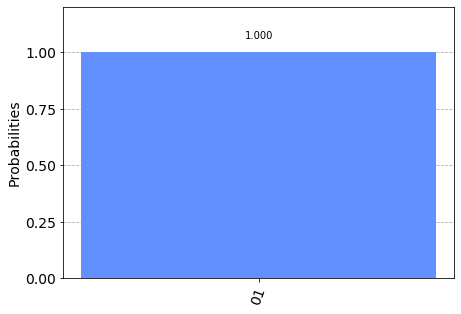

In [32]:
qobj = assemble(qc_ha)
sim = Aer.get_backend('qasm_simulator')
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)